# Model API Development by example



## Sample problem
We will use stationary thermo-mechanical analysis of cantilever beam as an example.

<img src="Images/ThermoMechanicalBeam.png">


<img src="Images/ThemoMechanicalModa.png" width="600px">

Where heat conduction and thermo-elastic models are served by the third-party solvers. 

Our simplistic thermal model has following inputs:
* External temperature on top surface (Newton BC, $\bar{q}=\alpha(T-T^E)$) represented as mupif Property data type.
* External temperature on bottom surface (Newton BC) represented as mupif Property data type.

And following output:
* Temperature field represented as mupif Field data type.

Mupif Property represent quantity with specific physical meaning.

Mupif Field is represenatation of spatial field (scalar field in our case), again with specific physical meaning and units.

We will show step by step how to develop API for thermal model using indirect approach.

The first step is to define model metadata.


### Define model metadata 
<pre>
{
    "ClassName": "OOFEM_T_demo",
    "ModuleName": "oofem_demo_thermal",
    "Name": "OOFEM demo API thermal",
    "ID": "OOFEM_Thermal_demo",
    "Description": "OOFEM thermal demo solver",
    "Version_date": "1.0.0, Jan 2023",
    "Inputs": [
        {
            "Name": "temperature",
            "Type": "mupif.Property",
            "Required": true,
            "Type_ID": "mupif.DataID.PID_Temperature",
            "Units": "deg_C",
            "Obj_ID": "top_edge",
            "Set_at": "timestep",
            "ValueType": "Scalar"
        },
        {
            "Name": "temperature",
            "Type": "mupif.Property",
            "Required": true,
            "Type_ID": "mupif.DataID.PID_Temperature",
            "Units": "deg_C",
            "Obj_ID": "bottom_edge",
            "Set_at": "timestep",
            "ValueType": "Scalar"
        }
    ],
    "Outputs": [
        {
            "Name": "temperature",
            "Type_ID": "mupif.DataID.FID_Temperature",
            "Type": "mupif.Field",
            "Units": "deg_C"
        }
    ],
    "Solver": {
        "Software": "OOFEM",
        "Type": "Finite elements",
        "Accuracy": "High",
        "Sensitivity": "Low",
        "Complexity": "High",
        "Robustness": "High",
        "Estim_time_step_s": 1,
        "Estim_comp_time_s": 1,
        "Estim_execution_cost_EUR": 0.01,
        "Estim_personnel_cost_EUR": 0.01,
        "Required_expertise": "None",
        "Language": "C++",
        "License": "LGPL",
        "Creator": "Borek Patzak",
        "Version_date": "1.0.0, Dec 2022",
        "Documentation": "oofem.org"
    },
    "Physics": {
        "Type": "Continuum",
        "Entity": "Other",
        "Equation": [],
        "Equation_quantities": [],
        "Relation_description": [],
        "Relation_formulation": [],
        "Representation": "Finite elements"
    },
    "Execution_settings": {
        "Type": "Distributed",
        "jobManName": "CVUT.Thermal_demo",
        "Class": "OOFEM_T_demo",
        "Module": "oofem_demo_thermal"
    }
}
</pre>


### Generate API template
Use a tool at https://mupif.org/wecg/api_generator.html
Insert the metadata and get the generated API template code.
Implement the solveStep method.


### API implementation


<table>
<tr>
<th width="600px"> Generated template </th>
<th width="600px"> Implementation </th>
</tr>
<tr>
<td valign="top">

```python
import mupif
import Pyro5

@Pyro5.api.expose
class OOFEM_T_demo(mupif.Model):
    def __init__(self, metadata=None):
        
        MD = {
            "ClassName": "OOFEM_T_demo",
            "ModuleName": "oofem_demo_thermal",
            "Name": "OOFEM demo API thermal",
            "ID": "OOFEM_Thermal_demo",
            "Description": "OOFEM thermal demo solver",
            "Version_date": "1.0.0, Jan 2023",
            "Inputs": [
                {
                    "Name": "temperature",
                    "Type": "mupif.Property",
                    "Required": True,
                    "Type_ID": "mupif.DataID.PID_Temperature",
                    "Units": "deg_C",
                    "Obj_ID": "top_edge",
                    "Set_at": "timestep",
                    "ValueType": "Scalar"
                },
                {
                    "Name": "temperature",
                    "Type": "mupif.Property",
                    "Required": True,
                    "Type_ID": "mupif.DataID.PID_Temperature",
                    "Units": "deg_C",
                    "Obj_ID": "bottom_edge",
                    "Set_at": "timestep",
                    "ValueType": "Scalar"
                }
            ],
            "Outputs": [
                {
                    "Name": "temperature",
                    "Type_ID": "mupif.DataID.FID_Temperature",
                    "Type": "mupif.Field",
                    "Units": "deg_C"
                }
            ],
            "Solver": {
                "Software": "OOFEM",
                "Type": "Finite elements",
                "Accuracy": "High",
                "Sensitivity": "Low",
                "Complexity": "High",
                "Robustness": "High",
                "Estim_time_step_s": 1,
                "Estim_comp_time_s": 1,
                "Estim_execution_cost_EUR": 0.01,
                "Estim_personnel_cost_EUR": 0.01,
                "Required_expertise": "None",
                "Language": "C++",
                "License": "LGPL",
                "Creator": "Borek Patzak",
                "Version_date": "1.0.0, Dec 2022",
                "Documentation": "oofem.org"
            },
            "Physics": {
                "Type": "Continuum",
                "Entity": "Other",
                "Equation": [],
                "Equation_quantities": [],
                "Relation_description": [],
                "Relation_formulation": [],
                "Representation": "Finite elements"
            },
            "Execution_settings": {
                "Type": "Distributed",
                "jobManName": "CVUT.Thermal_demo",
                "Class": "OOFEM_T_demo",
                "Module": "oofem_demo_thermal"
            }
        }

        super().__init__(metadata=MD)
        self.updateMetadata(metadata)

        self.input_temperature_top_edge = None
        self.input_temperature_bottom_edge = None
        self.output_temperature = None



    def initialize(self, workdir='', metadata=None, validateMetaData=True, **kwargs):
        super().initialize(workdir=workdir, metadata=metadata, validateMetaData=validateMetaData, **kwargs)



    def get(self, objectTypeID, time=None, objectID=""):
        if objectTypeID == mupif.DataID.FID_Temperature:
            if self.output_temperature is None:
                raise ValueError("Value not defined")
            return self.output_temperature



    def set(self, obj, objectID=""):
        if obj.isInstance(mupif.Property) and obj.getDataID() == mupif.DataID.PID_Temperature and objectID == "top_edge":
            self.input_temperature_top_edge = obj
        if obj.isInstance(mupif.Property) and obj.getDataID() == mupif.DataID.PID_Temperature and objectID == "bottom_edge":
            self.input_temperature_bottom_edge = obj



    def solveStep(self, tstep, stageID=0, runInBackground=False):
        for inp in [self.input_temperature_top_edge, self.input_temperature_bottom_edge]:
            if inp is None:
                raise ValueError("A required input was not defined")
        
        raise NotImplementedError("Not implemented")
























if __name__ == '__main__':
    import oofem_demo_thermal
    ns = mupif.pyroutil.connectNameserver()
    jobMan = mupif.SimpleJobManager(
        ns=ns,
        appClass=oofem_demo_thermal.OOFEM_T_demo,
        appName='CVUT.Thermal_demo',
        maxJobs=10
    ).runServer()

```

</td><td valign="top">

``` python
import mupif
import Pyro5

@Pyro5.api.expose
class OOFEM_T_demo(mupif.Model):
    def __init__(self, metadata=None):

        MD = {
            "ClassName": "OOFEM_T_demo",
            "ModuleName": "oofem_demo_thermal",
            "Name": "OOFEM demo API thermal",
            "ID": "OOFEM_Thermal_demo",
            "Description": "OOFEM thermal demo solver",
            "Version_date": "1.0.0, Jan 2023",
            "Inputs": [
                {
                    "Name": "temperature",
                    "Type": "mupif.Property",
                    "Required": True,
                    "Type_ID": "mupif.DataID.PID_Temperature",
                    "Units": "deg_C",
                    "Obj_ID": "top_edge",
                    "Set_at": "timestep",
                    "ValueType": "Scalar"
                },
                {
                    "Name": "temperature",
                    "Type": "mupif.Property",
                    "Required": True,
                    "Type_ID": "mupif.DataID.PID_Temperature",
                    "Units": "deg_C",
                    "Obj_ID": "bottom_edge",
                    "Set_at": "timestep",
                    "ValueType": "Scalar"
                }
            ],
            "Outputs": [
                {
                    "Name": "temperature",
                    "Type_ID": "mupif.DataID.FID_Temperature",
                    "Type": "mupif.Field",
                    "Units": "deg_C"
                }
            ],
            "Solver": {
                "Software": "OOFEM",
                "Type": "Finite elements",
                "Accuracy": "High",
                "Sensitivity": "Low",
                "Complexity": "High",
                "Robustness": "High",
                "Estim_time_step_s": 1,
                "Estim_comp_time_s": 1,
                "Estim_execution_cost_EUR": 0.01,
                "Estim_personnel_cost_EUR": 0.01,
                "Required_expertise": "None",
                "Language": "C++",
                "License": "LGPL",
                "Creator": "Borek Patzak",
                "Version_date": "1.0.0, Dec 2022",
                "Documentation": "oofem.org"
            },
            "Physics": {
                "Type": "Continuum",
                "Entity": "Other",
                "Equation": [],
                "Equation_quantities": [],
                "Relation_description": [],
                "Relation_formulation": [],
                "Representation": "Finite elements"
            },
            "Execution_settings": {
                "Type": "Distributed",
                "jobManName": "CVUT.Thermal_demo",
                "Class": "OOFEM_T_demo",
                "Module": "oofem_demo_thermal"
            }
        }

        super().__init__(metadata=MD)
        self.updateMetadata(metadata)

        self.input_temperature_top_edge = None
        self.input_temperature_bottom_edge = None
        self.output_temperature = None



    def initialize(self, workdir='', metadata=None, validateMetaData=True, **kwargs):
        super().initialize(workdir=workdir, metadata=metadata, validateMetaData=validateMetaData, **kwargs)



    def get(self, objectTypeID, time=None, objectID=""):
        if objectTypeID == mupif.DataID.FID_Temperature:
            if self.output_temperature is None:
                raise ValueError("Value not defined")
            return self.output_temperature



    def set(self, obj, objectID=""):
        if obj.isInstance(mupif.Property) and obj.getDataID() == mupif.DataID.PID_Temperature and objectID == "top_edge":
            self.input_temperature_top_edge = obj
        if obj.isInstance(mupif.Property) and obj.getDataID() == mupif.DataID.PID_Temperature and objectID == "bottom_edge":
            self.input_temperature_bottom_edge = obj



    def solveStep(self, tstep, stageID=0, runInBackground=False):
        for inp in [self.input_temperature_top_edge, self.input_temperature_bottom_edge]:
            if inp is None:
                raise ValueError("A required input was not defined")

        # create input file from template
        file = open('inp_oofem_thermal.in', 'rt')
        inp_content = file.read()
        file.close()
        #
        inp_content = inp_content.replace('{top_temperature}', str(self.input_temperature_top_edge.inUnitsOf('deg_C').getValue()))
        inp_content = inp_content.replace('{bottom_temperature}', str(self.input_temperature_bottom_edge.inUnitsOf('deg_C').getValue()))
        #
        file = open('temp_oofem_thermal.in', 'wt')
        file.write(inp_content)
        file.close()

        # execute oofem
        result = subprocess.run(['/home/stanislav/Projects/oofem/build/oofem', '-f', 'temp_oofem_thermal.in'], capture_output=True, encoding='UTF-8', cwd=os.getcwd())

        # load the field from vtk
        filename = 'demot.out.m0.1.vtu'
        self.output_temperature = mp.Field.makeFromMeshioMesh(filename, unit={'Temperature': mp.U.deg_C, 'Displacement': mp.U.m}, time=0*mp.U.s)[0]


if __name__ == '__main__':
    import oofem_demo_thermal
    ns = mupif.pyroutil.connectNameserver()
    jobMan = mupif.SimpleJobManager(
        ns=ns,
        appClass=oofem_demo_thermal.OOFEM_T_demo,
        appName='CVUT.Thermal_demo',
        jobManWorkDir='.',
        maxJobs=10
    ).runServer()

```

</td>
</tr>
</table>




In [1]:

import mupif
import Pyro5
import subprocess


@Pyro5.api.expose
class OOFEM_T_demo(mupif.Model):
    def __init__(self, metadata=None):

        MD = {
            "ClassName": "OOFEM_T_demo",
            "ModuleName": "oofem_demo_thermal",
            "Name": "OOFEM demo API thermal",
            "ID": "OOFEM_Thermal_demo",
            "Description": "OOFEM thermal demo solver",
            "Version_date": "1.0.0, Jan 2023",
            "Inputs": [
                {
                    "Name": "temperature",
                    "Type": "mupif.Property",
                    "Required": True,
                    "Type_ID": "mupif.DataID.PID_Temperature",
                    "Units": "deg_C",
                    "Obj_ID": "top_edge",
                    "Set_at": "timestep",
                    "ValueType": "Scalar"
                },
                {
                    "Name": "temperature",
                    "Type": "mupif.Property",
                    "Required": True,
                    "Type_ID": "mupif.DataID.PID_Temperature",
                    "Units": "deg_C",
                    "Obj_ID": "bottom_edge",
                    "Set_at": "timestep",
                    "ValueType": "Scalar"
                }
            ],
            "Outputs": [
                {
                    "Name": "temperature",
                    "Type_ID": "mupif.DataID.FID_Temperature",
                    "Type": "mupif.Field",
                    "Units": "deg_C"
                }
            ],
            "Solver": {
                "Software": "OOFEM",
                "Type": "Finite elements",
                "Accuracy": "High",
                "Sensitivity": "Low",
                "Complexity": "High",
                "Robustness": "High",
                "Estim_time_step_s": 1,
                "Estim_comp_time_s": 1,
                "Estim_execution_cost_EUR": 0.01,
                "Estim_personnel_cost_EUR": 0.01,
                "Required_expertise": "None",
                "Language": "C++",
                "License": "LGPL",
                "Creator": "Borek Patzak",
                "Version_date": "1.0.0, Dec 2022",
                "Documentation": "oofem.org"
            },
            "Physics": {
                "Type": "Continuum",
                "Entity": "Other",
                "Equation": [],
                "Equation_quantities": [],
                "Relation_description": [],
                "Relation_formulation": [],
                "Representation": "Finite elements"
            },
            "Execution_settings": {
                "Type": "Distributed",
                "jobManName": "CVUT.Thermal_demo",
                "Class": "OOFEM_T_demo",
                "Module": "oofem_demo_thermal"
            }
        }

        super().__init__(metadata=MD)
        self.updateMetadata(metadata)

        self.input_temperature_top_edge = None
        self.input_temperature_bottom_edge = None
        self.output_temperature = None

    def initialize(self, workdir='', metadata=None, validateMetaData=True, **kwargs):
        super().initialize(workdir=workdir, metadata=metadata, validateMetaData=validateMetaData, **kwargs)

    def get(self, objectTypeID, time=None, objectID=""):
        if objectTypeID == mupif.DataID.FID_Temperature:
            if self.output_temperature is None:
                raise ValueError("Value not defined")
            return self.output_temperature

    def set(self, obj, objectID=""):
        if obj.isInstance(mupif.Property) and obj.getDataID() == mupif.DataID.PID_Temperature and objectID == "top_edge":
            self.input_temperature_top_edge = obj
        if obj.isInstance(mupif.Property) and obj.getDataID() == mupif.DataID.PID_Temperature and objectID == "bottom_edge":
            self.input_temperature_bottom_edge = obj

    def solveStep(self, tstep, stageID=0, runInBackground=False):
        for inp in [self.input_temperature_top_edge, self.input_temperature_bottom_edge]:
            if inp is None:
                raise ValueError("A required input was not defined")

        # create input file from template
        file = open('inputs/inp_oofem_thermal.in', 'rt')
        inp_content = file.read()
        file.close()
        #
        inp_content = inp_content.replace('{top_temperature}', str(self.input_temperature_top_edge.inUnitsOf('deg_C').getValue()))
        inp_content = inp_content.replace('{bottom_temperature}', str(self.input_temperature_bottom_edge.inUnitsOf('deg_C').getValue()))
        #
        file = open('temp_oofem_thermal.in', 'wt')
        file.write(inp_content)
        file.close()

        # execute oofem
        result = subprocess.run(['/home/bp/devel/oofem.git/build/oofem', '-f', 'temp_oofem_thermal.in'], capture_output=True, encoding='UTF-8', cwd=os.getcwd())

        # load the field from vtk
        filename = 'demot.out.m0.1.vtu'
        self.output_temperature = mupif.Field.makeFromMeshioMesh(filename, unit={'Temperature': mupif.U.deg_C, 'Displacement': mupif.U.m}, time=0*mupif.U.s)[0]





### Testing the developped API 

<mupif.field.Field at 0x7f5414f6e2b0, FID_Temperature, time=0.0 s, unit=deg_C, dim=63×1, mesh=<mupif.mesh.UnstructuredMesh at 0x7f53e6437910, 63 vertices, 40 cells> >


100%|██████████| 40/40 [00:00<00:00, 13811.82 cells/s]

[4.285714] deg_C


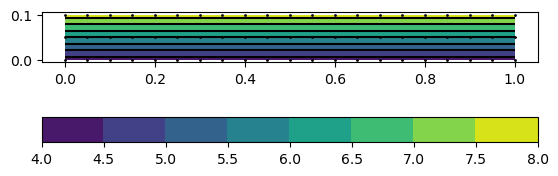

In [2]:
m = OOFEM_T_demo()


m.initialize(metadata={'Execution': { 'ID': '1', 'Use_case_ID': '1_1','Task_ID': '1' }})
m.set(mupif.ConstantProperty(value=10.*mupif.U.deg_C, propID=mupif.DataID.PID_Temperature, valueType=mupif.ValueType.Scalar, unit=mupif.U.deg_C), objectID='top_edge')
m.set(mupif.ConstantProperty(value=2.*mupif.U.deg_C, propID=mupif.DataID.PID_Temperature, valueType=mupif.ValueType.Scalar, unit=mupif.U.deg_C), objectID='bottom_edge')

tstep = mupif.timestep.TimeStep(time=1*mupif.U.s, dt=1*mupif.U.s, targetTime=10*mupif.U.s)

m.solveStep(tstep)
tf = m.get(mupif.DataID.FID_Temperature, tstep.getTime())
print (tf)
print (tf.evaluate((0,0,0)))
tf.plot2D()


&copy; CTU Team, 2021.